# Goal

Now that we have processed both datasets, we should prepare the final data that we will use for predictive model.

In [1]:
# Loading required libraries

import pandas as pd
import dask.dataframe as dd
import numpy as np

import gc
gc.enable()

from tqdm import tqdm_notebook as tqdm

import seaborn as sns

In [2]:
# PerfSubset data headers
header = ['loanID', 'currIntRate', 'zeroBalCode', 'zeroBalEffDate', 'lastPaidInstallmentDate', 'currActualUPB',
          'loanAge', 'remainingMonthsToLegalMaturity', 'adjustedMonthsToMaturity', 'maturityDate', 'msa',
          'currLoanDelinquencyStatus', 'modFlag', 'foreclosureDate', 'dispositionDate', 'foreclosureCosts',
          'otherForeclosureProceeds', 'nonInterestBearingUPB', 'foreclosurePrincipalWriteOffAmt']

In [3]:
perfSub = pd.read_csv('cmpnydata/perfSubset/loanperformancelatest.csv',header=None, names=header)

In [4]:
acqSub = pd.read_csv('cmpnydata/acqSubset/acqSubset-processed.csv')

In [5]:
perfSub.head()

,loanID,currIntRate,zeroBalCode,zeroBalEffDate,lastPaidInstallmentDate,currActualUPB,loanAge,remainingMonthsToLegalMaturity,adjustedMonthsToMaturity,maturityDate,msa,currLoanDelinquencyStatus,modFlag,foreclosureDate,dispositionDate,foreclosureCosts,otherForeclosureProceeds,nonInterestBearingUPB,foreclosurePrincipalWriteOffAmt
0,100181813956,3.750,NaN,NaN,NaN,262558.99,71,289.0,289.0,10/2042,41860,0,N,NaN,NaN,NaN,NaN,NaN,NaN
1,100490889815,4.000,NaN,NaN,NaN,140738.80,11,349.0,347.0,10/2047,48620,0,N,NaN,NaN,NaN,NaN,NaN,NaN
2,100506185215,6.500,9.0,12/2011,03/01/2011,86971.62,43,317.0,0.0,05/2038,20940,NaN,N,12/01/2011,03/01/2012,3202.75,98.07,NaN,NaN
3,100569225873,2.875,NaN,NaN,NaN,121867.74,73,107.0,107.0,08/2027,19100,0,N,NaN,NaN,NaN,NaN,NaN,NaN
4,100598268884,3.750,1.0,10/2017,NaN,205502.16,59,181.0,0.0,11/2032,14500,X,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
acqSub.drop(['Unnamed: 0'],axis=1,inplace=True)
acqSub.head()

,loanID,origChannel,sellerName,origIntRate,orgUPB,orgLoanTerm,orginationDate,firstPaymentDate,orgLTV,orgCombinedLTV,...,propType,numUnits,occType,propertyState,zipCodeShort,priMortgageInsurancePercent,prodType,coBorrowerCreditScoreAtOrigination,mortInsType,reloMortIndicator
0,100007365142,R,JPMORGAN CHASE BANK NA,8.000,75000,360,121999,22000,79.0,250.0,...,SF,1,P,PA,173,0.0,FRM,900.0,None,N
1,100007386460,B,JPMORGAN CHASE BANK NA,7.875,55000,180,12000,32000,69.0,250.0,...,CO,1,P,MD,208,0.0,FRM,900.0,None,N
2,100023274028,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.000,130000,360,12000,32000,61.0,250.0,...,SF,1,P,GA,300,0.0,FRM,782.0,None,N
3,100026859568,C,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.375,107000,360,22000,42000,95.0,250.0,...,SF,1,P,MO,633,25.0,FRM,900.0,1.0,N
4,100028993931,R,WELLS FARGO BANK N.A.,8.000,37000,180,22000,42000,63.0,250.0,...,SF,1,P,NC,286,0.0,FRM,900.0,None,N


In [7]:
# Checking if the loanIDs are unique in this dataset or not

acqSub['loanID'].value_counts().sort_values(ascending=False).head()

416821641264    1
497956225056    1
204031957011    1
856896512100    1
894037076069    1
Name: loanID, dtype: int64

In [8]:
perfSub['loanID'].value_counts().sort_values(ascending=False).head()

416821641264    1
125954986002    1
856896512100    1
894037076069    1
548434708529    1
Name: loanID, dtype: int64

In [9]:
len(acqSub)

3652611

In [10]:
len(perfSub)

3652611

Just to be sure of our approach, we also compared the length of both processed datasets and since they're the same, we're good to go.

In [2]:
# Joining both datasets based on loanID and saving them as a CSV to use them in future

data = pd.merge(acqSub,perfSub)

data.to_csv('cmpnydata/data.csv')

#data = pd.read_csv('cmpnydata/data.csv')

C:\Users\Priyanshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (29,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
data.head()

,Unnamed: 0,loanID,origChannel,sellerName,origIntRate,orgUPB,orgLoanTerm,orginationDate,firstPaymentDate,orgLTV,...,maturityDate,msa,currLoanDelinquencyStatus,modFlag,foreclosureDate,dispositionDate,foreclosureCosts,otherForeclosureProceeds,nonInterestBearingUPB,foreclosurePrincipalWriteOffAmt
0,0,100007365142,R,JPMORGAN CHASE BANK NA,8.000,75000,360,121999,22000,79.0,...,01/2030,0,X,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100007386460,B,JPMORGAN CHASE BANK NA,7.875,55000,180,12000,32000,69.0,...,02/2015,47900,X,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100023274028,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.000,130000,360,12000,32000,61.0,...,02/2030,12060,X,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100026859568,C,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.375,107000,360,22000,42000,95.0,...,03/2030,41180,X,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100028993931,R,WELLS FARGO BANK N.A.,8.000,37000,180,22000,42000,63.0,...,03/2015,25860,X,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.columns

Index(['Unnamed: 0', 'loanID', 'origChannel', 'sellerName', 'origIntRate',
       'orgUPB', 'orgLoanTerm', 'orginationDate', 'firstPaymentDate', 'orgLTV',
       'orgCombinedLTV', 'numBorrowers', 'orgDebttoIncomeRatio',
       'borrowerCreditScoreAtOrigination', 'firstTimeHomeBuyer', 'loanPurpose',
       'propType', 'numUnits', 'occType', 'propertyState', 'zipCodeShort',
       'priMortgageInsurancePercent', 'prodType',
       'coBorrowerCreditScoreAtOrigination', 'mortInsType',
       'reloMortIndicator', 'currIntRate', 'zeroBalCode', 'zeroBalEffDate',
       'lastPaidInstallmentDate', 'currActualUPB', 'loanAge',
       'remainingMonthsToLegalMaturity', 'adjustedMonthsToMaturity',
       'maturityDate', 'msa', 'currLoanDelinquencyStatus', 'modFlag',
       'foreclosureDate', 'dispositionDate', 'foreclosureCosts',
       'otherForeclosureProceeds', 'nonInterestBearingUPB',
       'foreclosurePrincipalWriteOffAmt'],
      dtype='object')

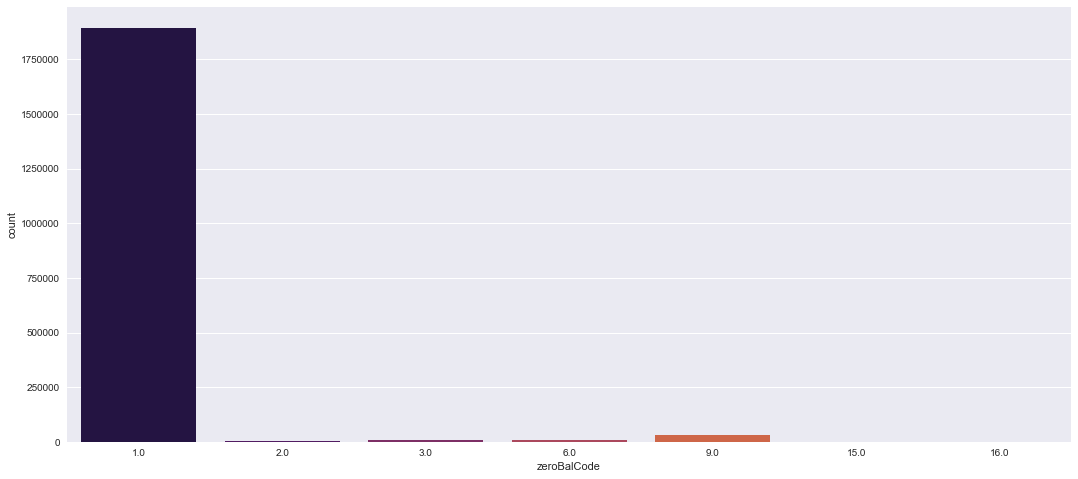

In [15]:
# We can see that most of the loans are not Risky since they were fully paid early or matured

sns.set(rc={'figure.figsize':(18,8)})
sns.countplot(data['zeroBalCode'],palette='inferno')

In [3]:
gc.collect()

7

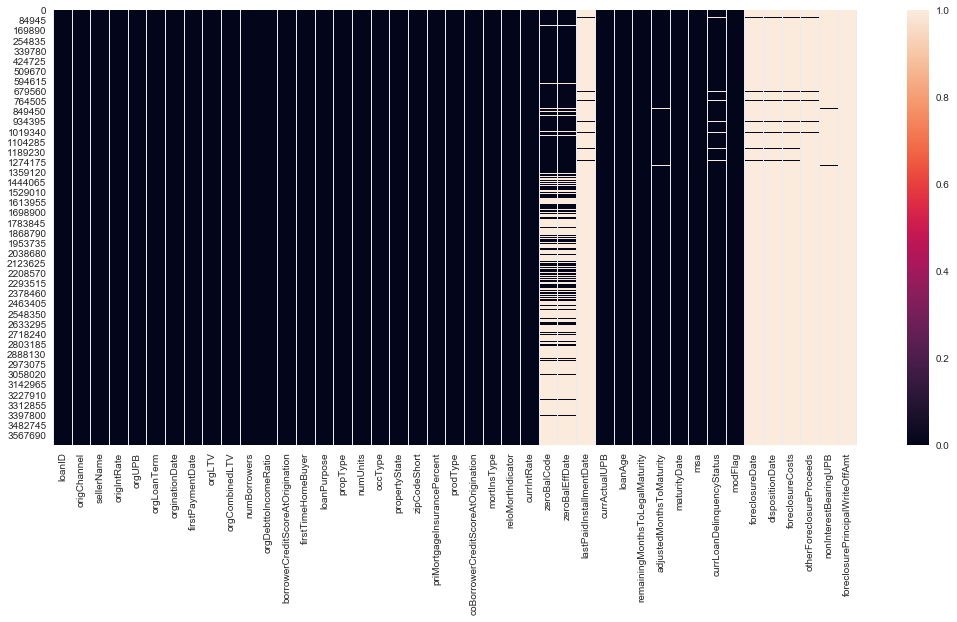

In [17]:
# A lot of missing values

sns.heatmap(data.isna())

We want to replace the NaN values with -1 as a flag so that we can easily access them whenever we want to

In [4]:
data['foreclosureDate'].fillna(-1,inplace=True)
data['zeroBalCode'].fillna(-1,inplace=True)

In [5]:
# Creating and adding a target column so that we can create our target class now

target = pd.DataFrame()

data = pd.concat([data,target],axis=1)

In [6]:
data = data.rename(columns={'Unnamed: 0': 'target'})

In [7]:
data['target'] = data[data['foreclosureDate']!=-1]['target'].map(lambda x: 'High Risk')

In [8]:
data['zeroBalCode'].value_counts()

 1.0     1895376
-1.0     1706676
 9.0       31138
 3.0        8768
 6.0        6857
 2.0        2625
 15.0       1125
 16.0         46
Name: zeroBalCode, dtype: int64

In [9]:
data['currLoanDelinquencyStatus']=data['currLoanDelinquencyStatus'].replace(np.NaN,-1)
data=data.replace('X',-1)
data['currLoanDelinquencyStatus']=data['currLoanDelinquencyStatus'].astype(int)

In [10]:
def code_delinq(value):
    
    if (value<30):
        value=1
    if (value>=30 and value<=89):
        value=2
    if (value> 89):
        value=3
    return value

In [11]:
data['currLoanDelinquencyStatus']=data['currLoanDelinquencyStatus'].apply(code_delinq)

data.head()

,target,loanID,origChannel,sellerName,origIntRate,orgUPB,orgLoanTerm,orginationDate,firstPaymentDate,orgLTV,...,maturityDate,msa,currLoanDelinquencyStatus,modFlag,foreclosureDate,dispositionDate,foreclosureCosts,otherForeclosureProceeds,nonInterestBearingUPB,foreclosurePrincipalWriteOffAmt
0,NaN,100007365142,R,JPMORGAN CHASE BANK NA,8.000,75000,360,121999,22000,79.0,...,01/2030,0,1,N,-1,NaN,NaN,NaN,NaN,NaN
1,NaN,100007386460,B,JPMORGAN CHASE BANK NA,7.875,55000,180,12000,32000,69.0,...,02/2015,47900,1,N,-1,NaN,NaN,NaN,NaN,NaN
2,NaN,100023274028,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.000,130000,360,12000,32000,61.0,...,02/2030,12060,1,N,-1,NaN,NaN,NaN,NaN,NaN
3,NaN,100026859568,C,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.375,107000,360,22000,42000,95.0,...,03/2030,41180,1,N,-1,NaN,NaN,NaN,NaN,NaN
4,NaN,100028993931,R,WELLS FARGO BANK N.A.,8.000,37000,180,22000,42000,63.0,...,03/2015,25860,1,N,-1,NaN,NaN,NaN,NaN,NaN


In [12]:
data['zeroBalCode'].value_counts()

 1.0     1895376
-1.0     1706676
 9.0       31138
 3.0        8768
 6.0        6857
 2.0        2625
 15.0       1125
 16.0         46
Name: zeroBalCode, dtype: int64

In [13]:
data['currLoanDelinquencyStatus'].value_counts()

1    3651183
2       1309
3        119
Name: currLoanDelinquencyStatus, dtype: int64

## Criteria used to create TARGET classes

In [14]:
def target(zeroBalCode,Delinquent_Ind,Foreclosure_Ind):
    if(Foreclosure_Ind!=-1):
        val='High-Risk'
    elif (zeroBalCode==-1.0 and Delinquent_Ind==3) or (zeroBalCode in [2.0,3.0,6.0,9.0,15.0]):
        val='High-Risk'
    elif (zeroBalCode==-1.0 and Delinquent_Ind==2) or (zeroBalCode==16.0):
        val='Moderate-Risk'
    else: 
        val='No-Risk'
    return val

In [16]:
data['target']=data.apply(lambda row: target(row['zeroBalCode'], row['currLoanDelinquencyStatus'],
                                               row['foreclosureDate']), axis=1)
data.head()

,target,loanID,origChannel,sellerName,origIntRate,orgUPB,orgLoanTerm,orginationDate,firstPaymentDate,orgLTV,...,maturityDate,msa,currLoanDelinquencyStatus,modFlag,foreclosureDate,dispositionDate,foreclosureCosts,otherForeclosureProceeds,nonInterestBearingUPB,foreclosurePrincipalWriteOffAmt
0,No-Risk,100007365142,R,JPMORGAN CHASE BANK NA,8.000,75000,360,121999,22000,79.0,...,01/2030,0,1,N,-1,NaN,NaN,NaN,NaN,NaN
1,No-Risk,100007386460,B,JPMORGAN CHASE BANK NA,7.875,55000,180,12000,32000,69.0,...,02/2015,47900,1,N,-1,NaN,NaN,NaN,NaN,NaN
2,No-Risk,100023274028,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.000,130000,360,12000,32000,61.0,...,02/2030,12060,1,N,-1,NaN,NaN,NaN,NaN,NaN
3,No-Risk,100026859568,C,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.375,107000,360,22000,42000,95.0,...,03/2030,41180,1,N,-1,NaN,NaN,NaN,NaN,NaN
4,No-Risk,100028993931,R,WELLS FARGO BANK N.A.,8.000,37000,180,22000,42000,63.0,...,03/2015,25860,1,N,-1,NaN,NaN,NaN,NaN,NaN


In [19]:
data['target'].value_counts()

No-Risk          3600624
High-Risk          50632
Moderate-Risk       1355
Name: target, dtype: int64

In [20]:
data.to_csv('cmpnydata/final_data.csv')

# END

After so many complex functions to create our desired target class, it is time to go forward and create a predictive model.